## 📌 **Step 1: Importing Required Libraries**

This cell imports all the essential Python libraries used throughout the project.

---

### 🔧 **System & File Handling**

* `os`, `zipfile`, `shutil`, `random`:
  *Used for handling file paths, extracting zip files, copying/moving files, and shuffling data.*

---

### 📊 **Data Analysis & Visualization**

* `pandas`, `numpy`:
  *Core libraries for handling tabular and numerical data.*
* `matplotlib.pyplot`, `seaborn`:
  *For plotting images, metrics, confusion matrices, and data exploration.*

---

### ⚖️ **Class Balancing**

* `compute_class_weight` from `sklearn`:
  *To calculate weights for imbalanced datasets to improve model fairness.*

---

### 🖼️ **Image Data Preparation**

* `ImageDataGenerator`:
  *Used for image preprocessing and real-time data augmentation.*

---

### 🧠 **Model Building (Keras / TensorFlow)**

* `Sequential`, `load_model`:
  *To define or load a deep learning model.*
* `Conv2D`, `MaxPooling2D`, `Dropout`, `Flatten`, `Dense`, `BatchNormalization`:
  *Common layers used in CNN architectures.*

---

### ⏱️ **Training Control**

* `EarlyStopping`, `ReduceLROnPlateau`, `ModelCheckpoint`:
  *Callbacks for managing training duration, preventing overfitting, and saving best models.*

---

### 📦 **Transfer Learning Architectures**

* `VGG16`, `ResNet152`, `ResNet50`, `EfficientNetB0`, `MobileNetV2`:
  *Pre-trained models on ImageNet used to leverage learned features and speed up convergence.*

---

### 📈 **Evaluation Metrics**

* `classification_report`, `confusion_matrix`, `ConfusionMatrixDisplay`, `precision_recall_curve`:
  *For assessing model accuracy, precision, recall, and visualizing performance.*




In [32]:
import os
import zipfile
import shutil
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense  , BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau , ModelCheckpoint
from tensorflow.keras.applications import VGG16 , ResNet152 , ResNet50 , EfficientNetB0 , MobileNetV2
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay , precision_recall_curve

## 📂 **Step 2: Extracting the Dataset**

This cell handles the extraction of the compressed dataset zip file.

* **`zip_path`**:
  *Specifies the path to the `.zip` file containing the image dataset.*

* **`extract_path`**:
  *Destination folder where the contents will be extracted. In this case, the current directory (`.`).*

* **`zipfile.ZipFile(...).extractall(...)`**:
  *Opens the zip file in read mode and extracts all contents to the specified directory.*

✅ **Output**:
Once completed, it prints `extract done!` to confirm successful extraction.

In [2]:
zip_path = r'C:\Users\T A T\project\Machin Learning\neural network\stone\datasets\archive (51).zip'
extract_path = '.'
with zipfile.ZipFile(zip_path , 'r') as zipf:
    zipf.extractall(extract_path)
print('extraxt done!')

extraxt done!


## 🗂️ **Step 3: Splitting Dataset into Train, Validation, and Test Sets**

This cell organizes the dataset by splitting images into training, validation, and test folders for each class.

---

### 🔧 **Directory Setup**

* **`source_dir`**: Path to the folder containing the raw data (e.g., `'./stone'`, `'./normal'`).
* **`output_dir`**: Output location where split folders will be created.

---

### 📊 **Split Ratios**

* **`train_ratio = 0.7`** → 70% for training
* **`val_ratio = 0.2`** → 20% for validation
* **`test_ratio = 0.1`** → 10% for testing

---

### 🛠️ **Folder Creation**

Creates subdirectories for each class (`stone`, `normal`) under:

* `./splitted_dataset/train/`
* `./splitted_dataset/val/`
* `./splitted_dataset/test/`

---

### 🔁 **Data Splitting**

For each class:

1. Lists all image files.
2. Randomly shuffles them.
3. Calculates the number of images for each split.
4. Copies files into their respective directories using `shutil.copyfile`.

---

✅ **Output**:
Once completed, prints `split sone!` to confirm successful splitting of the dataset.


In [ ]:

source_dir = '.'

output_dir = './splitted_dataset'


train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1


for split in ['train', 'val', 'test']:
    for cls in ['stone', 'normal']:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)


for cls in ['stone', 'normal']:
    cls_path = os.path.join(source_dir, cls)
    all_files = os.listdir(cls_path)
    random.shuffle(all_files)

    total = len(all_files)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    splits = {
        'train': all_files[:train_end],
        'val': all_files[train_end:val_end],
        'test': all_files[val_end:]
    }

    for split, files in splits.items():
        for f in files:
            src_path = os.path.join(cls_path, f)
            dst_path = os.path.join(output_dir, split, cls, f)
            shutil.copyfile(src_path, dst_path)

print("split sone!")

split sone!


## 🧪 **Step 4: Image Preprocessing & Augmentation**

In this step, we prepare the data for training by using Keras' `ImageDataGenerator`, which allows real-time data augmentation and normalization.

---

### 🔄 **Training Data Generator (`train_generator`)**

* `rescale=1./255`: Normalizes pixel values to the range `[0, 1]`.
* `shear_range=0.1`: Applies shear transformations for generalization.
* `zoom_range=0.2`: Random zoom-in/zoom-out.
* `rotation_range=30`: Random rotations up to 30 degrees.
* `width_shift_range=0.2`, `height_shift_range=0.2`: Translates the image along the width/height.
* `horizontal_flip=True`, `vertical_flip=True`: Randomly flips images in both directions.
* `fill_mode='nearest'`: Fills in empty pixels after transformations.

> ⚠️ These augmentations help prevent overfitting by increasing dataset diversity.

---

### 📏 **Validation & Test Generators**

* Both **`val_generator`** and **`test_generator`** only use `rescale=1./255`,
  ensuring **no data augmentation** is applied during validation or testing.

> ✅ This guarantees that validation and test results reflect real-world performance.


## 🧪 **Image Augmentation & Normalization (Revisited)**

This cell prepares image data generators for training, validation, and testing using Keras' `ImageDataGenerator`.

---

### 🔁 **Training Data Augmentation**

The training generator applies multiple random transformations to increase data diversity and reduce overfitting:

* `rescale=1./255`: Normalize pixel values to `[0, 1]`
* `shear_range=0.1`: Shear transformations
* `zoom_range=0.2`: Random zooms
* `rotation_range=30`: Random rotations
* `width_shift_range=0.2`, `height_shift_range=0.2`: Horizontal/vertical translations
* `horizontal_flip=True`, `vertical_flip=True`: Flipping in both directions
* `fill_mode='nearest'`: Fills empty areas after transforms

---

### 📏 **Validation & Test Generators**

These use **only normalization** (`rescale=1./255`) to ensure evaluation is based on unaltered images.

> ✅ Use augmentation only on training data. Keep validation/test clean for accurate performance metrics.


In [4]:
train_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0 ,
    shear_range = 0.1 , 
    zoom_range = 0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
)

val_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0

)

test_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

## 🧾 **Step 5: Loading the Image Data from Folders**

In this step, we use the `flow_from_directory()` method from Keras to load images from structured directories into training, validation, and test datasets.

---

### 📁 **Directory Structure**

Each folder (`train`, `val`, `test`) contains two subfolders:

```
splitted_dataset/
    ├── train/
    │   ├── stone/
    │   └── normal/
    ├── val/
    └── test/
```

---

### ⚙️ **Configuration Parameters**

* **`target_size=(224, 224)`**: Resizes all images to 224×224 pixels (common size for pretrained CNNs).
* **`batch_size=32`**: Processes 32 images per batch.
* **`class_mode='binary'`**: Binary classification (stone vs. normal).
* **`color_mode='rgb'`**: Ensures images are read in color (3 channels).
* **`shuffle=True` (only for training)**: Randomizes training batches to improve learning.

---

### 📤 **Outputs**

These calls return three generators:

* `train`: Augmented, shuffled training data
* `val`: Clean validation data for monitoring model performance
* `test`: Clean test data for final evaluation

> ✅ This setup is fully compatible with Keras’ `.fit()` and `.evaluate()` methods.

---

Next step is usually **model definition** or **transfer learning setup**. Just send your next cell and I’ll format it like this!


In [5]:
train_path = './splitted_dataset/train'
val_path = './splitted_dataset/val'
test_path = './splitted_dataset/test'

train = train_generator.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    color_mode="rgb",
    shuffle = True
)

val = val_generator.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    color_mode="rgb",
    shuffle = False
)

test = test_generator.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    color_mode="rgb",
    shuffle = False,
)

Found 6590 images belonging to 2 classes.
Found 1882 images belonging to 2 classes.
Found 944 images belonging to 2 classes.


## 🖼️ **Step 6: Visualizing a Sample Image**

In this step, we visualize one image from the training dataset to confirm that the data is correctly loaded and preprocessed.

---

### 🔍 **Code Explanation**

* **`images_batch, labels_batch = train[0]`**
  Retrieves the first batch (a tuple of images and labels) from the training generator.

* **`image = images_batch[0]`**
  Selects the first image in the batch.

* **`label = labels_batch[0]`**
  Gets the corresponding label (either `0.0` for *normal* or `1.0` for *stone*).

* **`plt.imshow(image, cmap='gray')`**
  Displays the image using Matplotlib.

  > Note: `cmap='gray'` can still be used with RGB images but isn't necessary unless it's grayscale.

* **`plt.title(f"Label: {label}")`**
  Shows the numeric label as the title.

---

✅ **Output**:
You should see one 224×224 image with its corresponding binary label, verifying your data flow works as expected.

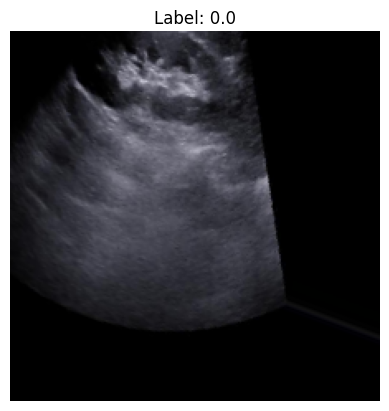

In [6]:
images_batch, labels_batch = train[0] 
image = images_batch[0]               
label = labels_batch[0]               

plt.imshow(image, cmap='gray')  
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

## 📊 **Step 7: Visualizing Class Distribution**

This cell helps evaluate whether the dataset is **balanced** or **imbalanced** by plotting the number of samples in each class.

---

### 🔍 **Code Breakdown**

* **`labels = ['stone'] * 5002 + ['normal'] * 4414`**
  Simulates the actual label distribution (replace with real counts if available).

  * `5002` images labeled as `"stone"`
  * `4414` images labeled as `"normal"`

* **`sns.countplot(x=labels)`**
  Uses Seaborn to create a **bar plot** showing the number of samples per class.

* **`plt.title('Class Distribution')`**
  Adds a title for clarity.

---

### 📈 **Why It Matters**

* A class imbalance (even a moderate one) can bias model training.
* If needed, techniques like **class weighting**, **oversampling**, or **data augmentation** can help compensate.

> ✅ It's good practice to always visualize class distribution before training.


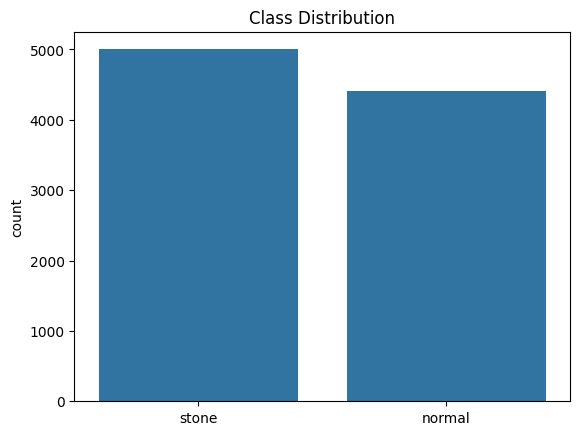

In [7]:
labels = ['stone'] * 5002 + ['normal'] * 4414
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.show()

## ⚖️ **Step 8: Computing Class Weights**

This step calculates **class weights** to help the model treat both classes fairly during training, especially when the dataset is imbalanced.

---

### 🔍 **Code Explanation**

* **`train.classes`**:
  Returns an array of class labels (`0` for normal, `1` for stone) from the training generator.

* **`np.unique(train.classes)`**:
  Gets the distinct class labels used.

* **`compute_class_weight(..., y=train.classes)`**:
  Calculates the inverse frequency of each class so the model gives more attention to underrepresented classes.

* **`class_weights_dict = dict(enumerate(class_weights))`**:
  Converts the result into a dictionary format `{0: weight_for_class_0, 1: weight_for_class_1}` — required for Keras' `fit()` function.

---

### 🎯 **Why Use Class Weights?**

* Prevents the model from being biased toward the majority class.
* Improves performance on minority classes (e.g., reduces false negatives for detecting stones).

> ✅ Pass `class_weight=class_weights_dict` to `model.fit()` during training.



In [8]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train.classes),
    y=train.classes
)

class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: 1.0666882486241502, 1: 0.9411596686660954}


## ⏱️ **Step 9: Defining Training Callbacks**

Callbacks are tools that help monitor the model during training and take action (like saving, stopping, or adjusting learning rate) to improve performance and prevent overfitting.

---

### 🔁 **Callback Details**

* **`EarlyStopping`**

  ```python
  EarlyStopping(monitor='val_loss', patience=6, mode='min')
  ```

  Stops training early if the validation loss does not improve for **6 consecutive epochs**.

---

* **`ReduceLROnPlateau`**

  ```python
  ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.5, min_lr=1e-6)
  ```

  Reduces the learning rate by **half** if `val_loss` plateaus for **4 epochs**, but will not go below `1e-6`.

---

* **`ModelCheckpoint`**

  ```python
  ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
  ```

  Saves the model to `'best_model.h5'` **only when validation loss improves** — ensuring you keep the best version.

---

> ✅ These callbacks make your training **more stable**, **adaptive**, and **efficient**.

In [9]:
early_stop = EarlyStopping(monitor='val_loss' , patience=6 , mode='min' )
rlop = ReduceLROnPlateau(monitor='val_loss' , patience=4 , factor=0.5 , min_lr=1e-6)
check_point =  ModelCheckpoint('best_model.h5' , monitor='val_loss' , model='min' , save_best_only=True)

## 🔍 **Step 10: Initializing the MobileNetV2 Base Model**

In this step, we load the **MobileNetV2** model as a **feature extractor** using pretrained weights from ImageNet.

---

### 🧠 **Transfer Learning Setup**

* **`MobileNetV2(weights="imagenet")`**:
  Loads the model with weights pretrained on the large-scale ImageNet dataset.

* **`include_top=False`**:
  Excludes the original classification head (so we can add a custom one for our binary task).

* **`input_shape=(224, 224, 3)`**:
  Sets the input size to match our images (RGB, 224×224).

---

### 🚫 **Freezing the Base**

```python
model_mobilenet.trainable = False
```

This ensures that the pretrained layers are **not updated during training**, which:

* Preserves learned features from ImageNet
* Speeds up training
* Reduces overfitting on small datasets

> ✅ Later, you can **fine-tune** specific layers by setting `trainable = True` on part of the model.

---

### 📋 **`model.summary()`**

This outputs the architecture of MobileNetV2, showing:

* Layer types
* Output shapes
* Parameter counts

In [10]:
model_mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model_mobilenet.trainable = False
model_mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

## 🧠 **Step 11: Building and Training the Model**

This step creates the full model by stacking a **custom classification head** on top of the **frozen MobileNetV2** base, and then trains it on the dataset.

---

### 🏗️ **Model Architecture**

* **`Sequential()`**: A linear stack of layers.
* **`model_mobilenet`**: Frozen pretrained base from earlier.
* **`GlobalAveragePooling2D()`**: Reduces feature maps to a single vector per image.
* **`Dense(128, activation='relu')`**: Fully connected layer with ReLU activation.
* **`Dropout(0.2)`**: Randomly deactivates 20% of neurons to reduce overfitting.
* **`Dense(1, activation='sigmoid')`**: Output layer for **binary classification**.

---

### ⚙️ **Compilation**

```python
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
```

* **Optimizer**: Adam (adaptive learning)
* **Loss**: Binary crossentropy (for two-class problems)
* **Metric**: Accuracy

---

### 🚀 **Model Training**

```python
model.fit(
    train,
    epochs=20,
    validation_data=val,
    callbacks=[early_stop, rlop, check_point],
    class_weight=class_weights_dict
)
```

* **`train`**: Training data generator
* **`validation_data=val`**: Used to monitor generalization
* **`epochs=20`**: Max number of training iterations
* **`callbacks`**:

  * `EarlyStopping`: Stops training early if `val_loss` stagnates
  * `ReduceLROnPlateau`: Lowers learning rate if needed
  * `ModelCheckpoint`: Saves the best model to disk
* **`class_weight=...`**: Helps correct class imbalance

---

✅ This marks the start of training with **transfer learning + custom head**, optimized for performance and stability.


In [11]:
model = Sequential()
model.add(model_mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train   , epochs=20, validation_data=val, callbacks=[early_stop , rlop , check_point] , class_weight=class_weights_dict)

Epoch 1/20
206/206 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.9042

c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


206/206 [==============================] - 190s 913ms/step - loss: 0.2307 - accuracy: 0.9042 - val_loss: 0.1416 - val_accuracy: 0.9357 - lr: 0.0010
Epoch 2/20
206/206 [==============================] - 103s 501ms/step - loss: 0.1411 - accuracy: 0.9448 - val_loss: 0.1218 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 3/20
206/206 [==============================] - 103s 498ms/step - loss: 0.1220 - accuracy: 0.9552 - val_loss: 0.0649 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 4/20
206/206 [==============================] - 106s 514ms/step - loss: 0.1007 - accuracy: 0.9621 - val_loss: 0.1053 - val_accuracy: 0.9527 - lr: 0.0010
Epoch 5/20
206/206 [==============================] - 108s 523ms/step - loss: 0.1009 - accuracy: 0.9618 - val_loss: 0.0570 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 6/20
206/206 [==============================] - 103s 501ms/step - loss: 0.0912 - accuracy: 0.9656 - val_loss: 0.0629 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 7/20
206/206 [==============================] - 138

## 📊 **Step 12: Evaluating the Trained Model**

After training, we load the **best saved model** and evaluate its performance on all three data splits: training, validation, and test.

---

### 📥 **Load the Best Model**

```python
model = load_model("./best_model.h5")
```

* Loads the version of the model saved by `ModelCheckpoint` (the one with the lowest validation loss).

---

### 📈 **Model Evaluation**

For each dataset (`train`, `val`, `test`):

```python
results = model.evaluate(data_generator)
```

* **`results[0]`** → Loss (binary crossentropy)
* **`results[1]`** → Accuracy

Each result is printed with:

```python
print(f"Accuracy: {results[1] * 100:.2f}%")
```

---

### ✅ **Why Evaluate on All Sets?**

* **Train Accuracy** → Shows how well the model fits the training data.
* **Validation Accuracy** → Indicates how well the model generalizes during training.
* **Test Accuracy** → True performance on completely unseen data.

> 📌 Ideally, all three should be reasonably close.
> A large gap might indicate overfitting or underfitting.


In [12]:
model = load_model("./best_model.h5")
results = model.evaluate(train)
print(f"train Loss: {results[0]:.4f}")
print(f"train Accuracy: {results[1] * 100:.2f}%")

results = model.evaluate(val)
print(f"Val Loss: {results[0]:.4f}")
print(f"Val Accuracy: {results[1] * 100:.2f}%")

results = model.evaluate(test)
print(f"test Loss: {results[0]:.4f}")
print(f"test Accuracy: {results[1] * 100:.2f}%")

206/206 [==============================] - 83s 398ms/step - loss: 0.0506 - accuracy: 0.9830
train Loss: 0.0506
train Accuracy: 98.30%
59/59 [==============================] - 20s 341ms/step - loss: 0.0178 - accuracy: 0.9952
Val Loss: 0.0178
Val Accuracy: 99.52%
30/30 [==============================] - 17s 580ms/step - loss: 0.0274 - accuracy: 0.9926
test Loss: 0.0274
test Accuracy: 99.26%


## 📉 **Step 13: Confusion Matrix & Classification Report**

After evaluating overall accuracy, this step digs deeper into **how** your model performs on each class using a confusion matrix and classification report.

---

### 📊 **Generating Predictions**

```python
y_pred_prob = model.predict(test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
```

* `predict(test)` returns class **probabilities**
* `( > 0.5 ).astype(int)` converts them to binary predictions:
  `0 = Normal`, `1 = Stone`

---

### 🎯 **True Labels**

```python
y_true = test.classes
```

* These are the **ground truth** labels from the test generator.

---

### 🧩 **Confusion Matrix**

```python
confusion_matrix(y_true, y_pred)
```

* Displays a summary of **true positives**, **false positives**, **true negatives**, and **false negatives**.
* `ConfusionMatrixDisplay` is used for visual plotting with a **blue heatmap**.

> ✅ Helps identify if the model tends to confuse one class with the other.

---

### 📋 **Classification Report**

```python
classification_report(y_true, y_pred, target_names=["Normal", "Stone"])
```

Gives a detailed breakdown per class:

* **Precision**: How many predicted positives are actually positive
* **Recall**: How many actual positives were correctly predicted
* **F1-score**: Harmonic mean of precision and recall
* **Support**: Number of true samples for each class

---

🧠 **Insight**:
Use this analysis to evaluate if your model needs further tuning — especially if it struggles on either `Normal` or `Stone`.

30/30 [==============================] - 11s 345ms/step


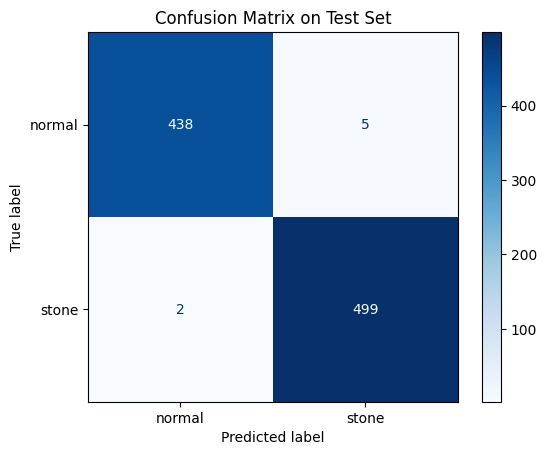

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       443
       Stone       0.99      1.00      0.99       501

    accuracy                           0.99       944
   macro avg       0.99      0.99      0.99       944
weighted avg       0.99      0.99      0.99       944



In [13]:
y_pred_prob = model.predict(test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

y_true = test.classes

# Confusion Matrix
cm = confusion_matrix(y_true , y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()


# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Stone"]))

## 📉 **Step 14: Evaluation on Validation Set**

This step performs a **detailed performance analysis** of the model on the **validation set**, using both a confusion matrix and a classification report.

---

### 🧠 **Why Validation Evaluation?**

Validation data is used to:

* Monitor model performance during training
* Tune hyperparameters
* Prevent overfitting

Analyzing its predictions helps ensure the model isn’t just memorizing the training set.

---

### 🔍 **Code Breakdown**

#### ✅ Prediction & Conversion

```python
y_pred_prob = model.predict(val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
```

* Converts probabilities into binary labels (`0` for normal, `1` for stone)

#### 🎯 True Labels

```python
y_true = val.classes
```

---

### 📊 **Confusion Matrix**

```python
ConfusionMatrixDisplay(...).plot()
```

* Plots how well the model distinguishes between **Normal** and **Stone** on the validation set
* Visualized using a **blue heatmap**

---

### 🧾 **Classification Report**

```python
classification_report(...)
```

* Shows **precision**, **recall**, **F1-score**, and **support** for each class

> 🔎 Look for balanced precision/recall scores across classes.
> Significant differences may indicate the model needs further tuning or rebalancing.

---

Let me know if you’d like to:

* Plot the training history (`accuracy`/`loss` curves)
* Visualize sample predictions
* Unfreeze MobileNetV2 and fine-tune


59/59 [==============================] - 21s 351ms/step


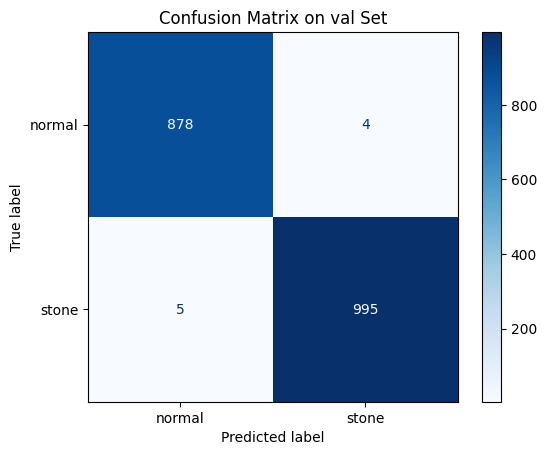

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       882
       Stone       1.00      0.99      1.00      1000

    accuracy                           1.00      1882
   macro avg       1.00      1.00      1.00      1882
weighted avg       1.00      1.00      1.00      1882



In [14]:
y_pred_prob = model.predict(val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

y_true = val.classes

# Confusion Matrix
cm = confusion_matrix(y_true , y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on val Set")
plt.show()


# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Stone"]))

## 🧪 **Step 15: Evaluation on Training Set**

In this step, we evaluate the trained model on the **training data** to check how well it has fit the data it learned from.

---

### 🔍 **Why Re-evaluate Training Data?**

* Helps detect **overfitting** (when training accuracy is high, but test/val accuracy is low)
* Useful for **debugging predictions**
* Complements validation/test performance analysis

---

### 📥 **Reload Training Data Without Shuffling**

```python
shuffle=False
```

Ensures prediction order matches label order for accurate evaluation.

---

### 🔄 **Prediction**

* **`model.predict(train_eval)`**: Generates prediction probabilities
* **`( > 0.5 ).astype(int).flatten()`**: Converts to binary class predictions

---

### 📊 **Confusion Matrix**

Displays how well the model distinguishes between the two training classes (`Normal` and `Stone`).
The matrix shows:

* True Positives (TP)
* False Positives (FP)
* True Negatives (TN)
* False Negatives (FN)

---

### 🧾 **Classification Report**

Provides per-class performance metrics:

* **Precision**
* **Recall**
* **F1-score**
* **Support** (sample count per class)

> ✅ High scores across all metrics here are expected — but they should still align reasonably with test/val performance for generalizability.

---

You're now in a great position to:

* Plot the **training history (loss & accuracy curves)**
* Visualize **sample predictions**
* Or even **fine-tune the model** further

Found 6590 images belonging to 2 classes.
206/206 [==============================] - 80s 389ms/step


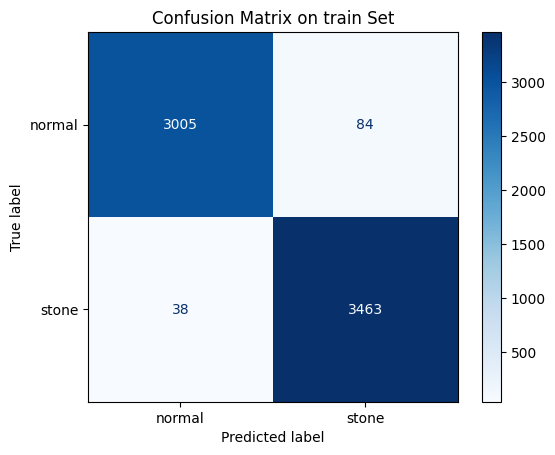

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98      3089
       Stone       0.98      0.99      0.98      3501

    accuracy                           0.98      6590
   macro avg       0.98      0.98      0.98      6590
weighted avg       0.98      0.98      0.98      6590



In [15]:
train_eval = train_generator.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    color_mode="rgb",
    shuffle = False
)



y_pred_prob = model.predict(train_eval)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

y_true = train_eval.classes

# Confusion Matrix
cm = confusion_matrix(y_true , y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_eval.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on train Set")
plt.show()


# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Stone"]))

## 📈 **Step 16: Visualizing Training History**

This step plots how the model's **accuracy** and **loss** changed over each epoch for both training and validation sets.

---

### 📊 **Left Plot – Accuracy**

* **`history.history['accuracy']`**: Training accuracy across epochs
* **`history.history['val_accuracy']`**: Validation accuracy across epochs

> 📈 Use this to assess if the model improved consistently and whether validation accuracy kept up with training accuracy.

---

### 📉 **Right Plot – Loss**

* **`history.history['loss']`**: Training loss per epoch
* **`history.history['val_loss']`**: Validation loss per epoch

> 🔍 A divergence between training and validation loss may indicate **overfitting**.

---

### ✅ **How to Interpret**

* If both accuracy curves rise and stabilize: ✅ good training.
* If training accuracy improves but validation accuracy stagnates or drops: ⚠️ overfitting.
* If both curves stay low: ⚠️ underfitting or architecture/learning rate issues.

---

You're almost done with a fully documented ML pipeline!
Want to add:

* Sample prediction visualization?
* ROC curve?
* Fine-tuning MobileNetV2?


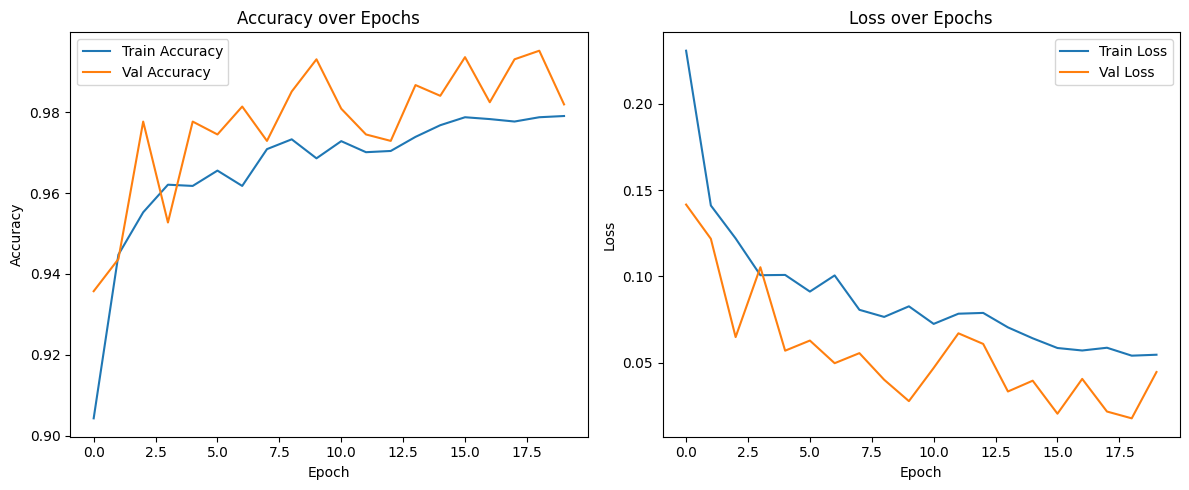

In [ ]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 🧪 **Step 17: Plotting the ROC Curve**

This step visualizes the **Receiver Operating Characteristic (ROC) curve** — a powerful tool for evaluating binary classification models.

---

### 📐 **What the ROC Curve Shows**

* **X-axis**: False Positive Rate (FPR)
* **Y-axis**: True Positive Rate (TPR / Recall)

Each point represents a different classification **threshold**. The curve shows the trade-off between sensitivity and specificity.

---

### 📈 **Code Explanation**

* **`roc_curve(y_true, y_pred_prob)`**
  Computes the FPR, TPR, and thresholds from predicted probabilities.

* **`auc(fpr, tpr)`**
  Calculates the **Area Under the Curve (AUC)** — a scalar score summarizing performance.

> ✅ AUC = 1.0 → perfect classifier
> ✅ AUC = 0.5 → no better than random guessing

---

### 🖼️ **Plot Details**

* Plots the ROC curve (blue line)
* Adds a dashed diagonal (`y=x`) for reference — representing a random model
* Displays the AUC score in the legend

---

### 🎯 **When to Use**

ROC curves are especially useful when:

* Classes are imbalanced
* You care about model performance across **different thresholds**, not just 0.5

---

You're nearly at a full, polished notebook now. Let me know if you want:

* A final conclusion cell
* Visualizing predictions (sample images + labels)
* Saving results for a report

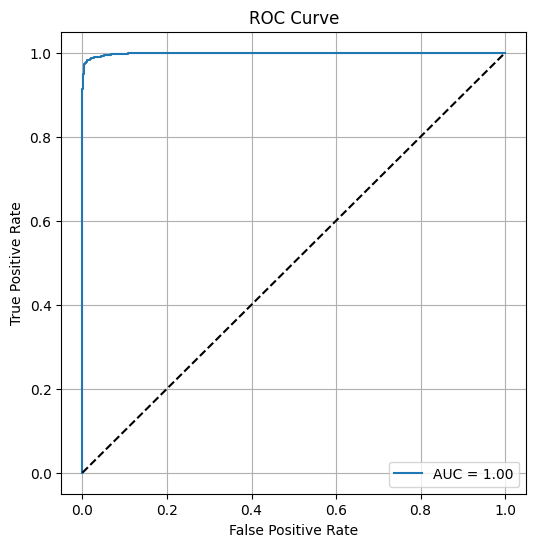

In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 📈 **Step 18: Precision–Recall (PR) Curve**

The Precision–Recall (PR) curve provides another perspective on your model's performance — particularly useful when the dataset is **imbalanced** (e.g., more "normal" than "stone" images).

---

### 📌 **What It Shows**

* **X-axis**: Recall (Sensitivity or True Positive Rate)
* **Y-axis**: Precision (how many predicted positives are correct)

Each point corresponds to a different classification threshold, just like the ROC curve.

---

### 📊 **Code Explanation**

* **`precision_recall_curve(y_true, y_pred_prob)`**
  Calculates precision and recall values across all thresholds.

* **`plt.plot(recall, precision)`**
  Plots the PR curve.

> 📉 A sharp drop in precision as recall increases may indicate that your model makes more false positives when trying to catch all positives.

---

### ✅ **When to Use PR Curve**

* More informative than ROC when dealing with **high class imbalance**
* Focuses directly on the **positive class performance**

> For example: detecting "stone" correctly might be more important than avoiding false alarms on "normal" cases — PR curves help analyze that.

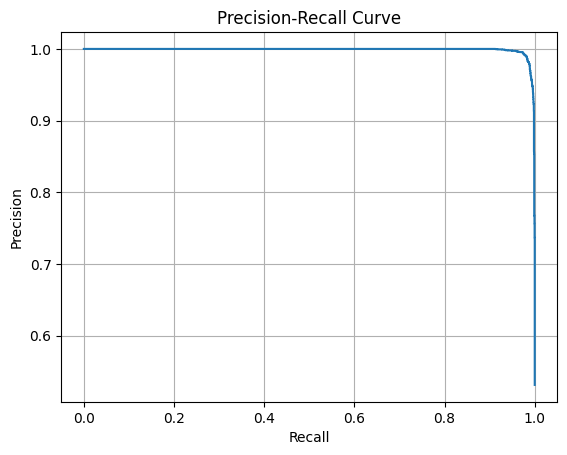

In [18]:
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

## 🖼️ **Step 19: Visualizing Sample Predictions**

This final step shows **5 randomly selected test images** along with:

* The model’s **predicted class**
* The **true label** from the test set

---

### 🔍 **Code Breakdown**

* **`random.randint(...)`**: Selects a random batch index from the test generator.
* **`img, label = test[...]`**: Retrieves the image and its label.
* **`model.predict(img)[0][0]`**: Predicts the probability that the image belongs to class `1` (Stone).
* **Prediction logic**:

  ```python
  pred_class = 'Stone' if pred > 0.5 else 'Normal'
  ```
* **`plt.imshow(img[0])`**: Displays the image
* **`plt.title(...)`**: Shows both **predicted** and **true** class for comparison.

---

### 🎯 **Why Visual Predictions Matter**

* Validates whether the model **"looks right"**
* Helps detect cases where the model is confidently wrong
* Makes your project more interpretable for **non-technical stakeholders**

> 🧪 Try running this multiple times to explore more predictions and identify edge cases.

---

✅ You’ve now built and documented a complete deep learning pipeline:

* Data preprocessing
* Augmentation
* Transfer learning
* Evaluation (metrics, plots, curves)
* Visual output

1/1 [==============================] - 1s 744ms/step


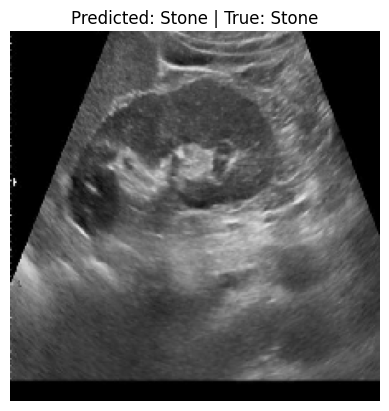

1/1 [==============================] - 0s 330ms/step


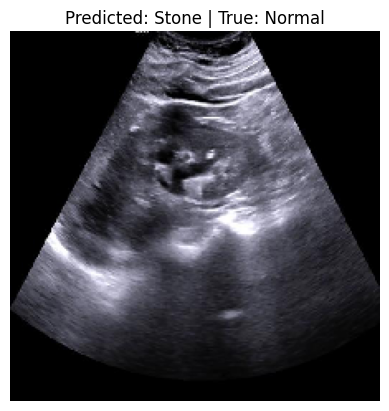

1/1 [==============================] - 0s 315ms/step


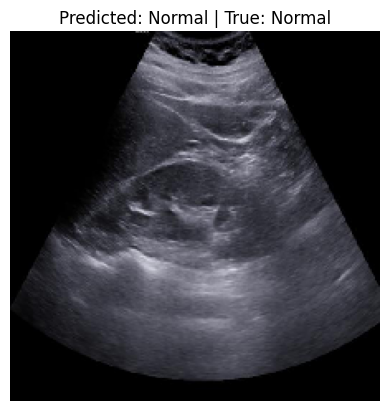

1/1 [==============================] - 0s 310ms/step


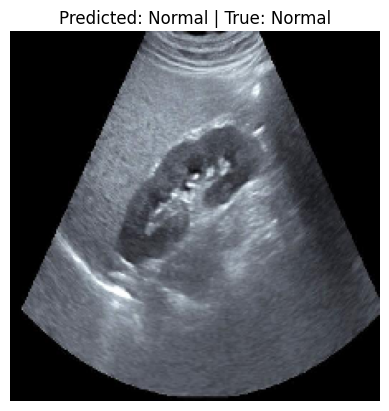

1/1 [==============================] - 1s 598ms/step


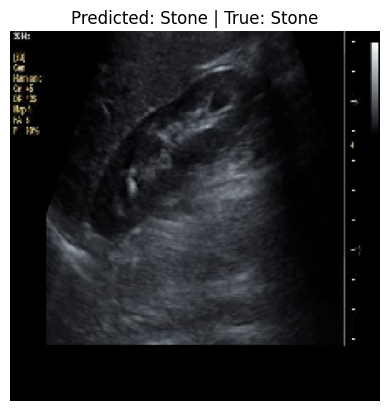

In [19]:
for i in range(5):
    img, label = test[random.randint(0, len(test)-1)]
    pred = model.predict(img)[0][0]
    pred_class = 'Stone' if pred > 0.5 else 'Normal'

    plt.imshow(img[0])
    plt.title(f'Predicted: {pred_class} | True: {"Stone" if label[0]==1 else "Normal"}')
    plt.axis('off')
    plt.show()

## 🧠 Re-running the Project with a Custom CNN Architecture

After testing transfer learning architectures like **MobileNet**,

we now re-run all the previous steps — including data preparation, training, evaluation, 

and visualization — using a **custom CNN model** designed from scratch.

In [20]:
train_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0 ,
    shear_range = 0.1 , 
    zoom_range = 0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
)

val_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0

)

test_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [28]:
train_path = './splitted_dataset/train'
val_path = './splitted_dataset/val'
test_path = './splitted_dataset/test'

train = train_generator.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode="binary",
    color_mode="grayscale",
    shuffle = True
)

val = val_generator.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode="binary",
    color_mode="grayscale",
    shuffle = False
)

test = test_generator.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode="binary",
    color_mode="grayscale",
    shuffle = False,
)

Found 6590 images belonging to 2 classes.
Found 1882 images belonging to 2 classes.
Found 944 images belonging to 2 classes.


In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 56, 56, 64)       

In [34]:
early_stop = EarlyStopping(monitor='val_loss' , patience=4 , mode='min' )
rlop = ReduceLROnPlateau(monitor='val_loss' , patience=3 , factor=0.5 , min_lr=1e-6)
check_point =  ModelCheckpoint('sequential_2.h5' , monitor='val_loss' , model='min' , save_best_only=True)

In [35]:
history = model.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks=[early_stop, rlop, check_point],
    class_weight=class_weights_dict
)

Epoch 1/10
330/330 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.9131

c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


330/330 [==============================] - 203s 612ms/step - loss: 0.2403 - accuracy: 0.9131 - val_loss: 0.0609 - val_accuracy: 0.9957 - lr: 0.0010
Epoch 2/10
330/330 [==============================] - 207s 628ms/step - loss: 0.1420 - accuracy: 0.9596 - val_loss: 0.0522 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 3/10
330/330 [==============================] - 205s 623ms/step - loss: 0.1189 - accuracy: 0.9653 - val_loss: 0.0527 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 4/10
330/330 [==============================] - 304s 923ms/step - loss: 0.1063 - accuracy: 0.9683 - val_loss: 0.0671 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 5/10
330/330 [==============================] - 260s 785ms/step - loss: 0.1024 - accuracy: 0.9713 - val_loss: 0.0825 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 6/10
330/330 [==============================] - 205s 622ms/step - loss: 0.1004 - accuracy: 0.9713 - val_loss: 0.0765 - val_accuracy: 0.9793 - lr: 5.0000e-04


In [36]:
model = load_model("./sequential_2.h5")
results = model.evaluate(train)
print(f"train Loss: {results[0]:.4f}")
print(f"train Accuracy: {results[1] * 100:.2f}%")

results = model.evaluate(val)
print(f"Val Loss: {results[0]:.4f}")
print(f"Val Accuracy: {results[1] * 100:.2f}%")

results = model.evaluate(test)
print(f"test Loss: {results[0]:.4f}")
print(f"test Accuracy: {results[1] * 100:.2f}%")

330/330 [==============================] - 38s 115ms/step - loss: 0.1012 - accuracy: 0.9700
train Loss: 0.1012
train Accuracy: 97.00%
95/95 [==============================] - 10s 106ms/step - loss: 0.0522 - accuracy: 0.9931
Val Loss: 0.0522
Val Accuracy: 99.31%
48/48 [==============================] - 5s 99ms/step - loss: 0.0673 - accuracy: 0.9936
test Loss: 0.0673
test Accuracy: 99.36%


48/48 [==============================] - 5s 100ms/step


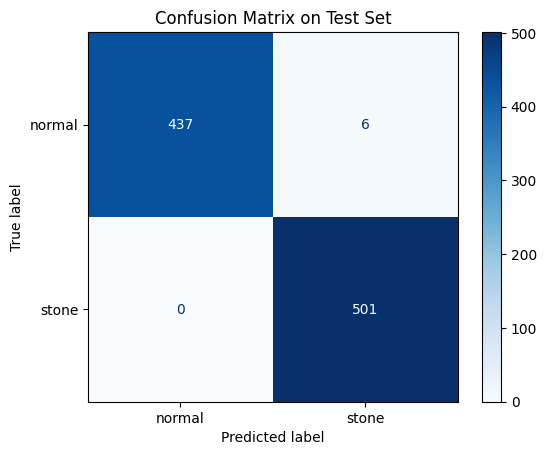

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       443
       Stone       0.99      1.00      0.99       501

    accuracy                           0.99       944
   macro avg       0.99      0.99      0.99       944
weighted avg       0.99      0.99      0.99       944



In [37]:
y_pred_prob = model.predict(test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

y_true = test.classes

# Confusion Matrix
cm = confusion_matrix(y_true , y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()


# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Stone"]))

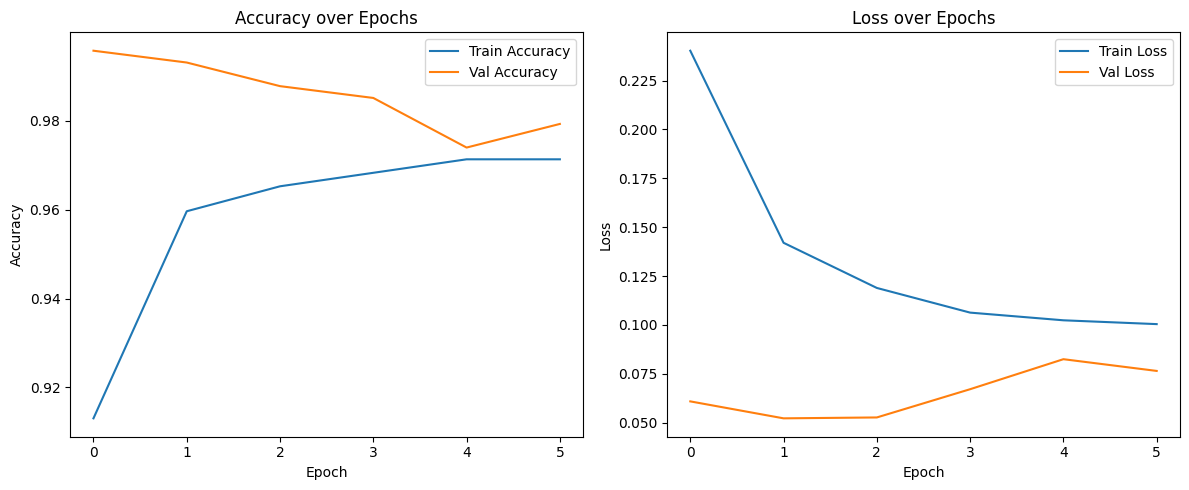

In [ ]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

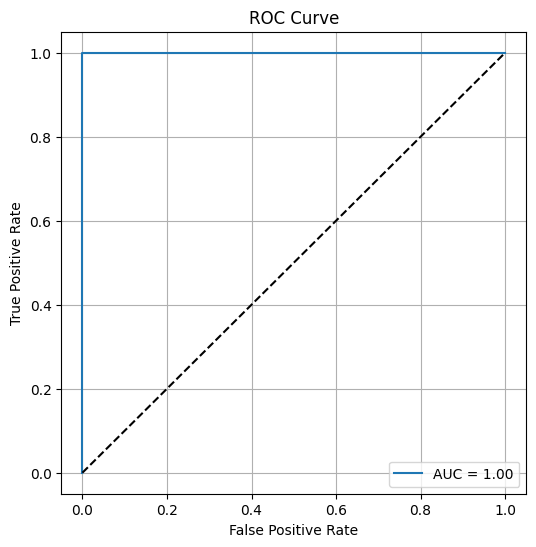

In [39]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 144ms/step


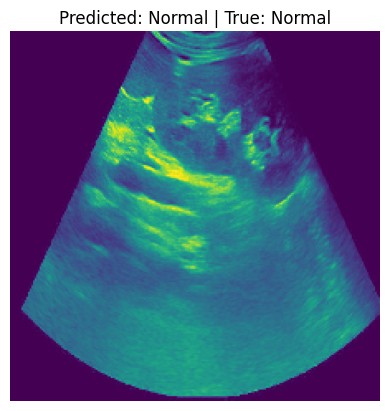

1/1 [==============================] - 0s 114ms/step


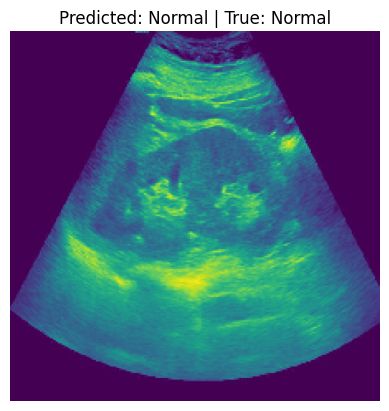

1/1 [==============================] - 0s 108ms/step


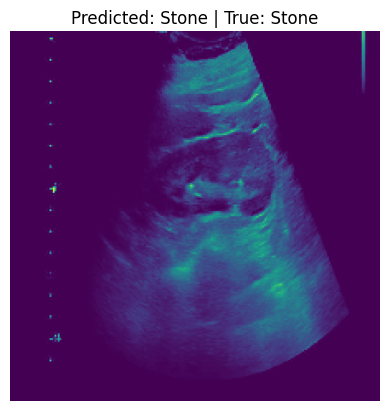

1/1 [==============================] - 0s 105ms/step


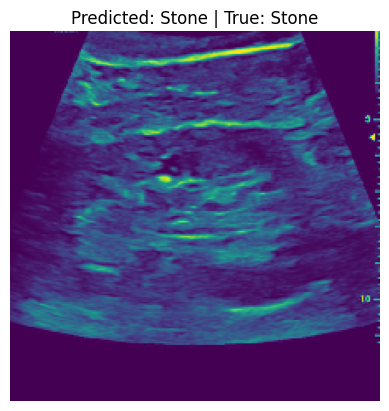

1/1 [==============================] - 0s 119ms/step


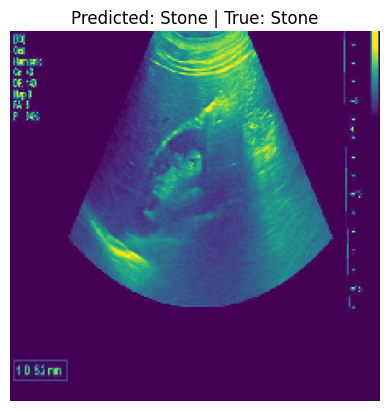

In [40]:
for i in range(5):
    img, label = test[random.randint(0, len(test)-1)]
    pred = model.predict(img)[0][0]
    pred_class = 'Stone' if pred > 0.5 else 'Normal'

    plt.imshow(img[0])
    plt.title(f'Predicted: {pred_class} | True: {"Stone" if label[0]==1 else "Normal"}')
    plt.axis('off')
    plt.show()